# Fetching  datasets

In [178]:
from sklearn.datasets import fetch_openml

In [179]:
mnist= fetch_openml('mnist_784')

In [180]:
x,y=mnist['data'], mnist['target']

In [181]:
x.shape

(70000, 784)

In [182]:
y.shape

(70000,)

In [183]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [184]:
some_digit = x[3601]
some_digit_image = some_digit.reshape(28,28)#arranged pixels into 28*28 so that we can read digit clearly

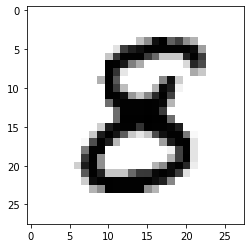

In [185]:
plt.imshow(some_digit_image, cmap= matplotlib.cm.binary, interpolation="nearest")
#plt.axis('off')

In [186]:
y[3601]

'8'

In [187]:
x_train, x_test= x[0:6000],x[6000:7000]

In [188]:
y_train, y_test= x[0:6000],x[6000:7000]

In [189]:
x_train = x_train.ravel()
x_test= x_test.ravel()
y_train= y_train.ravel()
y_test= y_train.ravel()

In [190]:
import numpy as np
shuffle_index= np.random.permutation(6000)
x_train,y_train = x_train[shuffle_index], y_train[shuffle_index]                                    

# creating a digit '0' detector

In [191]:
y_train = y_train.astype(np.int8)# string '1' is converted to = 1
y_test = y_test.astype(np.int8)
y_train_2 = (y_train.ravel()==8)
y_test_2= (y_test==8)# if '0' then print true else false

In [192]:
y_train

array([ 0,  0, -5, ...,  0,  0,  0], dtype=int8)

In [193]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [194]:
clf= LogisticRegression(tol=0.1,solver = 'lbfgs')

In [195]:
clf.fit(x_train.reshape(-1,1), y_train_2)# here in target we have used y_train_0 coz we need a classifier which says
# true if '0' else false. y_train_0 has all values from 0 to 9 converted into only 2 values -- true or false

LogisticRegression(tol=0.1)

In [196]:
some_digit=some_digit.reshape(-1,1)
clf.predict([some_digit[0]])

array([False])

In [197]:
from sklearn.model_selection  import cross_val_score
a=cross_val_score(clf, x_train.reshape(-1,1), y_train_2, cv=3, scoring="accuracy")

In [198]:
a.mean()

0.9994999999999999

In [199]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, x_train.reshape(-1,1), y_train_2, cv=3)

In [200]:
y_train_pred 

array([False, False, False, ..., False, False, False])

# Claculating confusion matrix

In [201]:
from sklearn.metrics import confusion_matrix

In [202]:
confusion_matrix(y_train_2, y_train_pred)

array([[5997,    0],
       [   3,    0]], dtype=int64)

In [203]:
confusion_matrix(y_train_2, y_train_2)# this is confusion matrix for perfect predictions

array([[5997,    0],
       [   0,    3]], dtype=int64)

# Precision and Recall

In [204]:
from sklearn.metrics import precision_score, recall_score

In [205]:
precision_score(y_train_2, y_train_pred)

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [206]:
recall_score(y_train_2, y_train_pred)

0.0

# F1 score

In [207]:
from sklearn.metrics import f1_score

In [208]:
f1_score(y_train_2, y_train_pred)

0.0

# Precision  Recall Curve

In [209]:
from sklearn.metrics import precision_recall_curve

In [210]:
y_scores= cross_val_predict(clf, x_train.reshape(-1,1), y_train_2, cv=3, method="decision_function")

In [211]:
precisions, recalls, thresholds = precision_recall_curve(y_train_2, y_scores)

In [212]:
precisions

array([6.10004067e-04, 4.06752085e-04, 2.03417413e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00])

In [213]:
recalls

array([1.        , 0.66666667, 0.33333333, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [214]:
thresholds

array([-7.53328791, -7.53228967, -7.5316708 , -7.52588152, -7.52483589,
       -7.5240953 , -7.51738211, -7.51106874, -7.50992834, -7.50894431,
       -7.50366235, -7.50247456, -7.49625596, -7.49379333, -7.48884957,
       -7.48621783, -7.48144318, -7.48011322, -7.47403679, -7.47265945,
       -7.47106684])

In [215]:
y_scores

array([-7.47106684, -7.47106684, -9.37251584, ..., -7.47265945,
       -7.47265945, -7.47265945])

# Plotting the precision recall curve

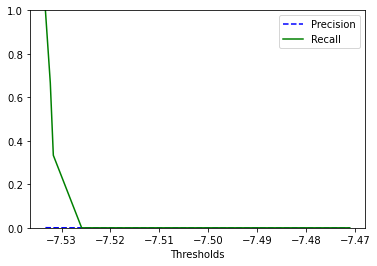

In [219]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Thresholds")
plt.legend(loc="upper right")
plt.ylim([0,1])
plt.show()